## An example of overfitting, but it has an intuitive result

In [6]:
from classy import *
from pylab import colorbar

In [7]:
d={}
for i in range(10):
    d['%d' % i]='data/simple_digits/%d.png' % i

images=image.load_images_from_filepatterns(**d)
images.target_names=[int(_) for _ in images.target_names]

[0]: 1 files found
	data/simple_digits/0.png
[1]: 1 files found
	data/simple_digits/1.png
[2]: 1 files found
	data/simple_digits/2.png
[3]: 1 files found
	data/simple_digits/3.png
[4]: 1 files found
	data/simple_digits/4.png
[5]: 1 files found
	data/simple_digits/5.png
[6]: 1 files found
	data/simple_digits/6.png
[7]: 1 files found
	data/simple_digits/7.png
[8]: 1 files found
	data/simple_digits/8.png
[9]: 1 files found
	data/simple_digits/9.png


In [8]:
images.data[0].shape

(16, 12)

In [9]:
data=image.images_to_vectors(images)

10 vectors of length 192
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p187', 'p188', 'p189', 'p190', 'p191'  (192 features)
Target values given.
Target names: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
Mean:  [   8.5   23.    54.5   95.2  128.1  142.3  140.   127.5  101.1   65.5
   31.2   14.1   18.5   45.3   98.3  152.4  190.4  205.3  201.3  187.4
  162.3  116.6   61.9   28.2   41.3   84.7  151.3  197.4  214.9  214.5
  206.8  204.4  206.   176.4  106.7   54.5   67.8  117.7  173.1  177.7
  152.9  129.   119.8  135.   175.3  190.9  137.3   79.8   87.   136.7
  168.9  131.7   80.7   55.6   51.6   71.4  128.   175.6  145.3   92.6
   89.4  136.6  155.   104.2   56.4   46.2   52.9   70.7  118.5  162.9
  136.8   87.6   79.8  123.1  143.6  109.3   83.8   90.3  106.   123.1
  151.8  167.4  125.1   75.2   69.   108.   136.8  128.3  127.3  146.3
  166.9  179.9  191.9  180.9  119.6   65.9   60.1   93.6  121.   121.1
  131.1  152.   170.1  179.7  189.   181.2  122.2   67.7   54.8  

<matplotlib.colorbar.Colorbar instance at 0x10b1a4cb0>

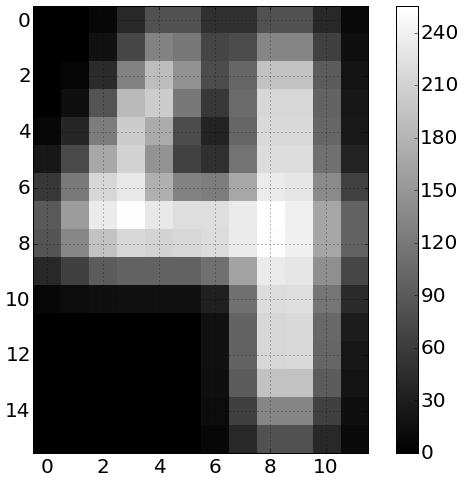

In [10]:
image.vector_to_image(data.vectors[4,:],(16,12))
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10b4a27a0>

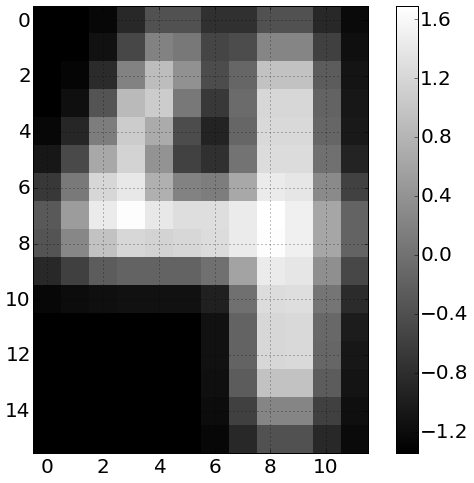

In [11]:
data.vectors-=data.vectors.mean()
data.vectors/=data.vectors.std()
image.vector_to_image(data.vectors[4,:],(16,12))
colorbar()

In [12]:
C=Perceptron()

In [13]:
timeit(reset=True)
C.fit(data.vectors,data.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.00275921821594 seconds 


In [14]:
print "On Training Set:",C.percent_correct(data.vectors,data.targets)

On Training Set: 100.0


In [15]:
C.weights

array([[ 0.54703502,  0.19036593, -0.29708182, ...,  1.31981804,
         1.36737392,  1.36737392],
       [ 0.52325708, -0.01174655, -1.05797587, ...,  0.55892399,
         1.16526144,  1.34359598],
       [ 1.84307512,  1.41507222, -0.18993867, ...,  4.5894271 ,
         5.04120794,  4.3516477 ],
       ..., 
       [ 2.14015694,  2.31849149,  2.22337973, ...,  0.60647987,
         1.1414835 ,  1.31981804],
       [ 3.04400347,  2.40199911,  1.72432785, ...,  3.34122771,
         3.53145122,  3.86434237],
       [ 1.93818688,  1.68851852,  1.26051561, ...,  0.2499532 ,
         1.85496409,  2.56830227]])

In [16]:
C.weights.shape

(10, 192)

In [17]:
C.output(data.vectors[2,:])

array([[ -61.56529126,  -77.34702196,   92.92704089, -128.3153225 ,
        -111.90751476,  -99.2861426 ,  -85.39152961,  -30.45245873,
        -109.68555388,  -40.51738523]])

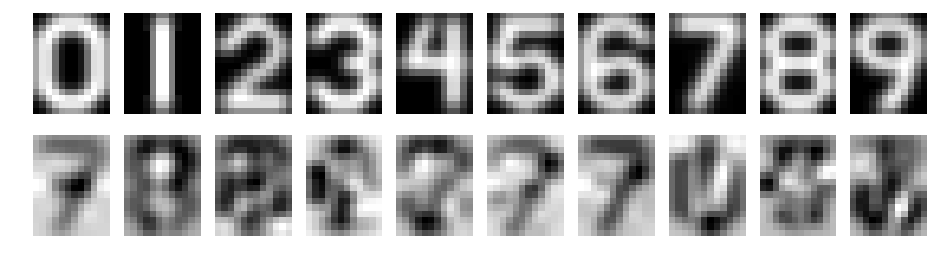

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    image.vector_to_image(data.vectors[i,:],(16,12))
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    image.vector_to_image(C.weights[i,:],(16,12))
    plt.axis('off')
    

In [19]:
data.targets

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [20]:
data.vectors.shape

(10, 192)

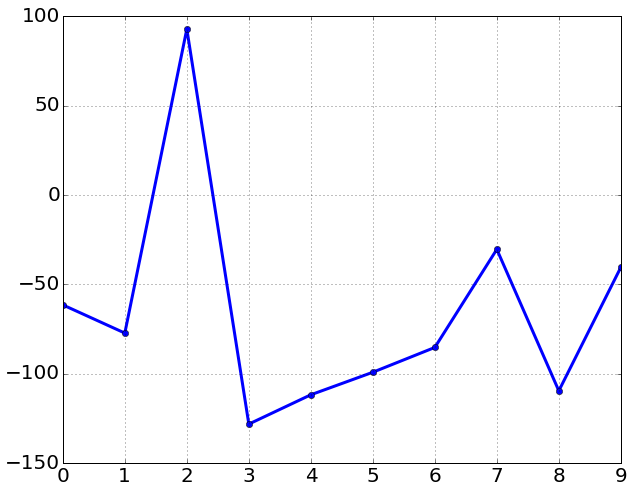

In [21]:
plt.plot(C.output(data.vectors[2,:]).ravel(),'-o')

In [22]:
C.output(data.vectors[2,:]).shape

(1, 10)

### Backprop - even though we don't need it

In [90]:
C=BackProp(hidden_layer_sizes = [4])
C.max_iter=5000
timeit(reset=True)
C.fit(data.vectors,data.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.084095954895 seconds 


In [91]:
print "On Training Set:",C.percent_correct(data.vectors,data.targets)

On Training Set: 100.0


In [92]:
C.layers_coef_[0].shape,C.layers_coef_[1].shape

((192, 4), (4, 10))

In [93]:
C.output(data.vectors[1,:])

[array([[  0.        ,  13.05683863,  27.72496992,   0.        ]]),
 array([[-26.04008753,  26.66688081,  -4.44523908,  -9.27665555,
          14.72504035,  13.98986546,  -1.20167407, -15.21757803,
         -15.03408915,  14.80698164]])]